In [ ]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (8,5)
plt.style.use('fivethirtyeight')

In [ ]:
chapters = open('lw.txt').read().split('CHAPTER ')[1:]

In [ ]:
# Counts of names in the chapters of Little Women

counts = bpd.DataFrame().assign(
    Amy=np.char.count(chapters, 'Amy'),
    Beth=np.char.count(chapters, 'Beth'),
    Jo=np.char.count(chapters, 'Jo'),
    Meg=np.char.count(chapters, 'Meg'),
    Laurie=np.char.count(chapters, 'Laurie'),
)
counts

# cumulative number of times each name appears

lw_counts = bpd.DataFrame().assign(
    Amy=np.cumsum(counts.get('Amy')),
    Beth=np.cumsum(counts.get('Beth')),
    Jo=np.cumsum(counts.get('Jo')),
    Meg=np.cumsum(counts.get('Meg')),
    Laurie=np.cumsum(counts.get('Laurie')),
    Chapter=np.arange(1, 48, 1)
)

# Lecture 5 

## Visualization

## Why visualize?

- Tables can be hard to interpret.
- We hope to spot trends through visualization.
- Many types: scatter plots, line graphs, bar charts, etc.
- The right choice depends on the type of data.

## Some terminology...

- **Individual**: Person/place/thing for which data is recorded.
- **Variable**: Something that is recorded for each individual, a.k.a. a "feature".

Variables can be of different kinds, including:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories.

## Examples of numerical variables

- Individual is an NBA player, variable is salary
- Individual is a movie, variable is gross
- Individual is a baby, variable is weight in kilograms

## Examples of categorical variables

- Individual is an NBA player, variable is team name
- Individual is a person in the census, variable is zip code
    - Even though looks like a number!
- Individual is a movie, variable is genre.

# Today

- Scatter Plot: numerical vs. numerical
- Line Plot: sequential numerical vs. numerical
- Bar Chart: categorical vs. numerical
- Histogram: distribution of categorical

In [ ]:
import babypandas as bpd
import numpy as np

# import/configure visualization tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Scatter plots

## A new dataset: `actors.csv`

|Column |Contents|
|----------|------------|
Actor|Name of actor
Total Gross|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
Number of Movies|	The number of movies the actor has been in
Average per Movie|	Total gross divided by number of movies
#1 Movie|	The highest grossing movie the actor has been in
Gross|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [ ]:
actors = bpd.read_csv('actors.csv').set_index('Actor')
actors

## Scatter plots

What is the relationship between `Number of Movies` and `Total Gross`?

In [ ]:
actors.plot(kind='scatter', x='Number of Movies', y='Total Gross')

## Scatter plots

- Visualize relationship between two numerical variables
```
dataframe.plot(
    kind='scatter', 
    x=x_column_name, 
    y=y_column_name
)
```
- First argument: the type of plot (scatter plot)
- Second argument: column for horizontal axis variable
- Third argument: column for vertical axis variable
- One point per row

## Scatter plots

What is the relationship between `Number of Movies` and `Average per Movie`?

In [ ]:
#- scatter plot
actors.plot(kind='scatter', x='Number of Movies', y='Average per Movie')

## Two interesting things...

- A *negative* association.
- An outlier.

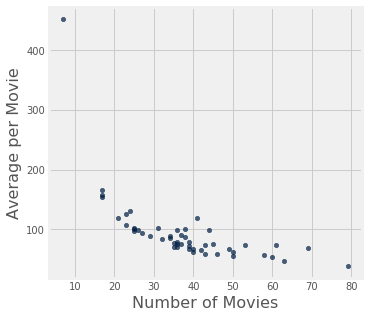


## Who are these people?

In [ ]:
#- get the actors for which "Number of Movies" > 60
actors[actors.get('Number of Movies') > 60]

## Who is the outlier?

- Made very few, high grossing movies.

In [ ]:
actors[actors.get('Number of Movies') < 10]

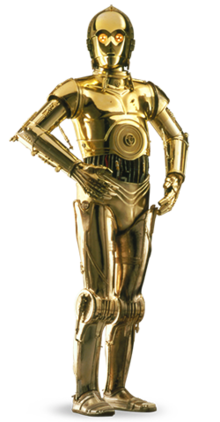

# Line graphs

## More new data: `movies_by_year.csv`

|Column|	Content|
|------|-----------|
Year|	Year
Total Gross|	Total domestic box office gross, in millions of dollars, of all movies released
Number of Movies|	Number of movies released
#1 Movie|	Highest grossing movie

In [ ]:
#: read from csv
movies_by_year = bpd.read_csv('movies_by_year.csv').set_index('Year')
movies_by_year

## Line graphs

- How has the number of movies changed over time?

In [ ]:
movies_by_year.plot(kind='line', y='Number of Movies')

## Line graphs

- Visualize sequential numerical vs numerical.
- Often used for trends in time.
```
dataframe.plot(
    kind='line', 
    x=x_column_label, 
    y=y_column_label
)
```
- First argument: kind of plot (line)
- Second argument: column for horizontal axis.
- Third argument: column for vertical axis.

## Plotting Tip

- **Tip**: if you want x-axis to be the index, omit the `x=` argument!
- Works for scatter plots, line plots, etc.

In [ ]:
movies_by_year.plot(kind='line', y='Number of Movies')

## Aside: Multiple Selections

- Let's focus on 2000-2012.
- We know how to select > 2000.
- And know how to selection < 2013.
- How do we select **between** 2000 and 2013?

In [ ]:
movies_by_year.index > 2000

In [ ]:
movies_by_year.index < 2013

In [ ]:
(movies_by_year.index > 2000) & (movies_by_year.index < 2013)

In [ ]:
movies_by_year[
    (movies_by_year.index > 2000) 
    & 
    (movies_by_year.index < 2013)
]

## The `&` operator

- Takes two boolean arrays of same size.
- Returns one boolean array in which an element is `True` only if the corresponding element in each input array is `True`.
- Parentheses are important!

In [ ]:
#- years before 1995 in which more than 500 movies were released


## Focus on 2000-2013:

In [ ]:
# let's focus on recent years (2000-2013)
(
    movies_by_year[
        (movies_by_year.index > 2000) & (movies_by_year.index < 2013)
    ]
    .plot(kind='line', y='Number of Movies')
)

What happened in 2009/2010?

## How did this affect total gross?

In [ ]:
# let's focus on recent years (2000-2013)
(
    movies_by_year[
        (movies_by_year.index > 2000) & (movies_by_year.index < 2013)
    ]
    .plot(kind='line', y='Total Gross')
)

## Trivia: what was the top movie of 2009?

In [ ]:
movies_by_year.get('#1 Movie').loc[2009]

## Discussion question

What was the top grossing movie of 1989?

    A. Batman
    B. Independence Day
    C. E.T.
    D. Toy Story
    E. Forrest Gump

## Answer

In [ ]:
def is_an_answer(s):
    return s in ['Batman', 'Independence Day', 'E.T.', 'Toy Story', 'Forrest Gump']

movies_by_year[movies_by_year.get('#1 Movie').apply(is_an_answer)]

# Bar Charts

## Yet another new data set: `top_movies.csv`

In [ ]:
#: read in the csv
top_movies = bpd.read_csv('top_movies.csv').set_index('Title')
top_movies

## Bar Charts

How many top movies has each studio released?

In [ ]:
#- make a Series of counts
s = top_movies.groupby('Studio').count().get('Gross')
s

In [ ]:
#- put it into a table called "count"
count = bpd.DataFrame().assign(
    Count=s
)
count

## Bar charts

- Height (vertical size) and spacing of bars is arbitrary.
- Only one numerical variable (horizontal axis)
- Order of vertical labels doesn't matter
- Somewhat confusing: `y='Count'`, but counts are on $x$ axis.

In [ ]:
count.plot(kind='barh', y='Count')

## A (slightly) nicer visualization...

In [ ]:
# sort the columns before plotting and make the plot bigger
count.sort_values('Count').plot(kind='barh', figsize=[8,8])

## Vertical bar charts

- Use `kind='bar'` instead of `kind='barh'`

In [ ]:
# sort the columns before plotting and make the plot bigger
count.sort_values('Count').plot(kind='bar', y='Count')

### Discussion question

Suppose we run this code. What do we get?

- A) A bar for each movie. Its length is the age of the movie.
- B) A bar for each age. Its length is the # of movies of that age.
- C) A bar for each age. Its length is the number of studios which produced movies of that age.

In [ ]:
top_movies.assign(
    Age=2017 - top_movies.get('Year')
).groupby('Age').count().plot(kind='barh', y='Studio', figsize=[5,15])

## Star Wars

- Which Star Wars movie was most successful by adjusted gross?
- How do we select all rows whose labels contain "Star Wars"?

## Answer: `index.str.contains()`

In [ ]:
top_movies.index.str.contains('Star Wars')

## Also works on columns:

In [ ]:
top_movies[top_movies.get('Studio').str.contains('Disney')]

## Which Star Wars movie was most successful?

In [ ]:
(
    top_movies[top_movies.index.str.contains('Star Wars')]
    .plot(kind='barh', y='Gross (Adjusted)')
)

# Histograms

### Visualizing distributions of numerical values

## Distribution of adjusted gross


- $x$ axis: adjusted gross (numerical)
- $y$ axis: a bar whose height encodes how many movies made about that much money
- group by adjusted gross, count, bar chart?

<img src="./histo.png"/>

In [ ]:
top_movies.groupby('Gross (Adjusted)').count()

## Plotting Histograms

- Call `.plot(kind='hist', y=column_name)`.
- Automatically places numbers into *bins*.
- Height of bar is *number* of values in corresponding *bin*.
- Optional: specify number of bins with `bins=`.

In [ ]:
top_movies.plot(kind='hist', y='Gross (Adjusted)', bins=20)

## Distribution of movies released by year

In [ ]:
top_movies.plot(kind='hist', y='Year', bins=20)

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

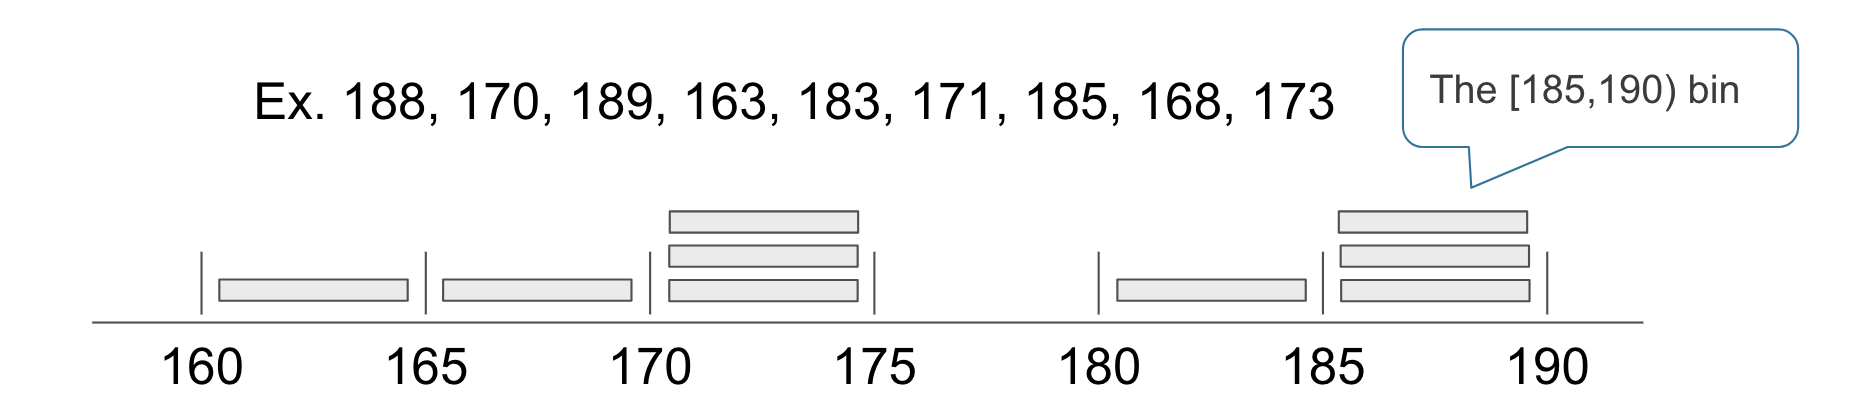    

## Custom Bins

- Can specify your own bins with a list.
- `bins=[1900, 1970, 1980, 1995, 2015]` creates bins: [1900, 1970), [1970, 1980), [1980, 1995), [1995, 2015]
- Note: last bin is inclusive!
- **Warning**: Data points not in any bin are not counted.

<center>
<img src="./bins.png"/>
</center>

In [ ]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins)

## A Problem

- It looks like a lot of movies were released every year between 2900 and 1970.
- But it's just because the bin is big.
- Actually: low number of movies released per year.
- Fix: use `density=True` keyword argument to make a *density histogram*.

In [ ]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins)

## Fix: Normalize bar by it's width

- Use the `density=True` keyword argument

In [ ]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins, density=True)

## Key Fact about Density Histograms

The **area** of a bar in a density histogram is:

- equal to the % of all data points that fall into that bin.
- equivalently, the probability that a data point, selected at random, falls into that bin.

In [ ]:
my_bins = [1900, 1970, 1980, 1995, 2015]
top_movies.get('Year').plot(kind='hist', bins=my_bins, density=True)

### How to calculate height in density histogram

- $\text{Area} = \text{Height} * \text{Width}$
- So $\text{Height} = \text{Area} / \text{Width} = \text{Percent} / \text{Width}$

**Example**: The $[1900, 1970)$ bin contains 42 out of 200 movies.
* So area is $42/200 = 21\%$
* The bin is $1970 - 1900 = 70$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{21 \%}{70\rm{\ years}} = 0.03\%\rm{\ per\ year} $$


## Important

In this class, "histogram" means "density histogram".

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
For distributions, height of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals